In [24]:
import os
import numpy as np
import pandas as pd
import bokeh
import seaborn as sns
import time, datetime
from datetime import datetime
from time import strftime
from time import gmtime

In [12]:
#Init Repo Data
Repo_data = "C:/Users/Consultant/Desktop/Decoded Data/AV/data"
listfile_data = os.listdir(Repo_data)

In [13]:
#Combine les fichier csv de Data en DataFrame - combined_data
os.chdir(Repo_data)
combined_data = pd.concat([pd.read_csv(f) for f in listfile_data ], ignore_index=True)

In [14]:
#Init Repo Metadata
Repo_meta = "C:/Users/Consultant/Desktop/Decoded Data/AV/metadata/"
listfile_meta = os.listdir(Repo_meta)

In [15]:
os.chdir(Repo_meta)
combined_meta = pd.concat([pd.read_csv(f) for f in listfile_meta ], ignore_index=True)

In [16]:
if(combined_meta.iloc[0][0] == combined_data.iloc[0][53]):
        data = pd.merge(combined_data, combined_meta, how='inner', on=['ID'])

In [50]:
e = data[data['ID'] == 'z5700015________zr_57_83015_____dcu4____________dcucbmdata______190415_092447']
m = e.iloc[4]['TimeStamp']
e.iloc[0]

TimeStamp                                                                                            0
Sleepmode                                                                                            1
Transition                                                                                           1
LT-V-DVR est active                                                                                  0
LT-V<2 est active                                                                                    1
LT-AO1 est active                                                                                    1
LT-AO2 est active                                                                                    1
LT-Ads est active                                                                                    0
LT-Acq est active                                                                                    0
LT-CF est active                                                         

In [278]:
test = data[data["Présence d'un défaut"] != 0]
t = bin(test["Code du défaut présent- Cf.Tableau des defauts"].iloc[0])
len(t)
len('1000000000000000000000000000000000000000000000')

46

In [51]:
len('1000000000000000000000000000000000000000000000')


46

In [11]:
data.dtypes

NameError: name 'data' is not defined

In [349]:
t = data
len(t['ID'].unique().tolist())
t = t[t.iloc[:]['ID'] == t.iloc[-1]['ID']]
t = t[['Transition','Courant moteur de la porte','Tension moteur de la porte','Position moteur de la porte','Courant moteur de la marche mobile', 'Tension moteur de la marche mobile', 'Position moteur de la marche mobile', 'ID','TimeStamp']]
#t.to_csv('test2.csv', index=False)
#t[t['Transition'] == 3]
t

,Transition,Courant moteur de la porte,Tension moteur de la porte,Position moteur de la porte,Courant moteur de la marche mobile,Tension moteur de la marche mobile,Position moteur de la marche mobile,ID,TimeStamp
39737,1,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,0.00
39738,2,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,0.05
39739,2,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,19.40
39740,2,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,22.55
39741,2,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,26.90
39742,2,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,32.80
39743,2,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,33.50
39744,7,0,0,0,0,0,0,z5700015________zr_57_83015_____dcu4__________...,33.75


In [304]:
i=1
p=0
s=0
d = {}
while i < len(t):
    time_t0 = datetime.strptime(t.iloc[i-1]['TimeStamp'],"%H:%M:%S")
    time_t1 = datetime.strptime(t.iloc[i]['TimeStamp'],"%H:%M:%S")
    diff = time_t1.minute - time_t0.minute
    if(diff > 1):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i]
        s=i
        i=i+1
        p=p+1
    elif(time_t1 == datetime.strptime(t.iloc[-1]['TimeStamp'],"%H:%M:%S")):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i+1]
        i=i+1
    else:
        i=i+1

TypeError: strptime() argument 1 must be str, not numpy.float64

In [325]:
i=1
p=0
s=0
d = {}
while i < len(t):
    time_t0 = t.iloc[i-1]['TimeStamp']
    time_t1 = t.iloc[i]['TimeStamp']
    diff = time_t1 - time_t0
    if(diff > 10.0):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i]
        s=i
        i=i+1
        p=p+1
    elif(time_t1 == t.iloc[-1]['TimeStamp']):
        echantillon = 'echantillon' + str(p)
        d[echantillon] = t.iloc[s:i+1]
        i=i+1
    else:
        i=i+1

In [326]:
n0 = d["echantillon0"]
n1 = d["echantillon1"]
n2 = d["echantillon2"]
n3 = d["echantillon3"]
n4 = d["echantillon4"]

KeyError: 'echantillon3'

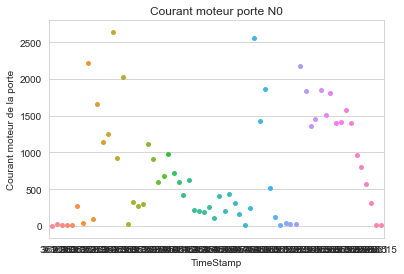

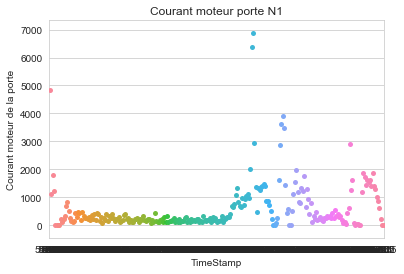

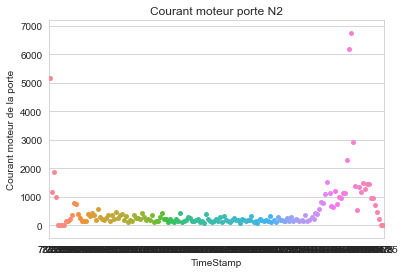

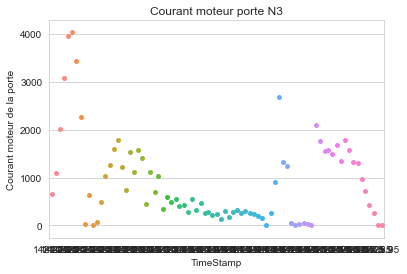

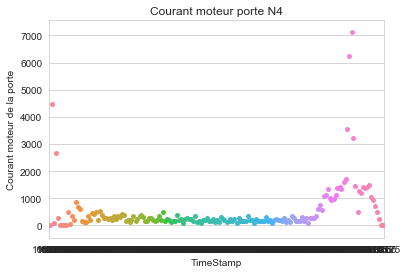

In [321]:
#echantillon0
sns.set_style("whitegrid")
p = sns.stripplot(x="TimeStamp", y="Courant moteur de la porte", data=n0) 
plt.title("Courant moteur porte N0")
plt.show(p)
#echantillon1
sns.set_style("whitegrid")
p = sns.stripplot(x="TimeStamp", y="Courant moteur de la porte", data=n1) 
plt.title("Courant moteur porte N1")
plt.show(p)
#echantillon2
sns.set_style("whitegrid")
p = sns.stripplot(x="TimeStamp", y="Courant moteur de la porte", data=n2) 
plt.title("Courant moteur porte N2")
plt.show(p)
#echantillon3
sns.set_style("whitegrid")
p = sns.stripplot(x="TimeStamp", y="Courant moteur de la porte", data=n3) 
plt.title("Courant moteur porte N3")
plt.show(p)
#echantillon4
sns.set_style("whitegrid")
p = sns.stripplot(x="TimeStamp", y="Courant moteur de la porte", data=n4) 
plt.title("Courant moteur porte N4")
plt.show(p)

In [322]:
n2

,Transition,Courant moteur de la porte,Tension moteur de la porte,Position moteur de la porte,Courant moteur de la marche mobile,Tension moteur de la marche mobile,Position moteur de la marche mobile,ID,TimeStamp
394,3,5168,-2100,816,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.50
395,5,1156,-1680,810,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.55
396,5,1855,-1478,807,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.60
397,5,994,-1716,802,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.65
398,5,13,-1732,796,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.70
399,5,6,-1810,789,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.75
400,5,6,-1781,783,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.80
401,5,13,-1433,777,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.85
402,5,161,-1325,773,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.90
403,5,160,-1428,768,0,0,0,z5700015________zr_57_83015_____dcu4__________...,733.95


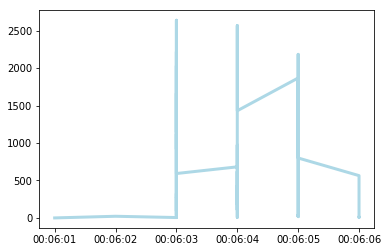

In [265]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n0['TimeStamp'], n0['Courant moteur de la porte'], color='lightblue', linewidth=3)
plt.savefig('C:/Users/Consultant/Desktop/decodeDoor/data_decode/fig/test.png')
plt.show()